In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

with open('traces_cp_disabled.pickle', 'rb') as f:
	traces_cp_disabled = pickle.load(f)
with open('traces_cp_enabled.pickle', 'rb') as f:
	traces_cp_enabled = pickle.load(f)

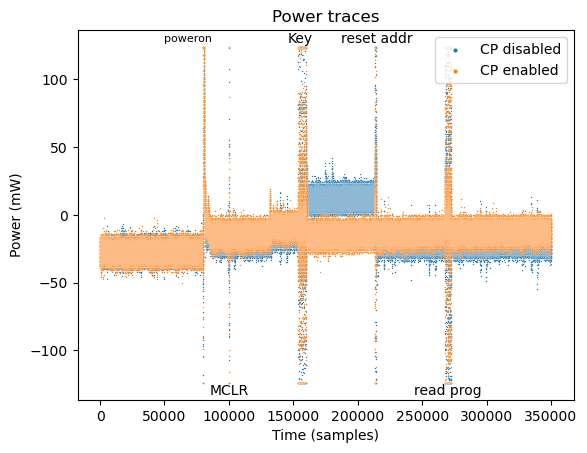

In [57]:
traces_scatter = sns.scatterplot(traces_cp_disabled[0], s=1, label='CP disabled')
sns.scatterplot(traces_cp_enabled[0], s=1, label='CP enabled')
traces_scatter.annotate('poweron', (68000, 130), ha='center', va='center', fontsize=8)
traces_scatter.annotate('MCLR', (100000, -130), ha='center', va='center')
traces_scatter.annotate('Key', (155000, 130), ha='center', va='center')
traces_scatter.annotate('reset addr', (215000, 130), ha='center', va='center')
traces_scatter.annotate('read prog', (270000, -130), ha='center', va='center')
traces_scatter.set(title='Power traces', xlabel='Time (samples)', ylabel='Power (mW)')
plt.legend(markerscale=3., loc='upper right')

In [51]:
hamming_weight = lambda x: bin(x).count("1")
PP = np.concatenate((
		np.full(len(traces_cp_enabled), hamming_weight(0x3F7F)),
		np.full(len(traces_cp_disabled), hamming_weight(0x3FFF)),
))

MM = np.array(traces_cp_enabled + traces_cp_disabled)

p_corrs = []

for column in MM.T:
	p_corrs.append(np.corrcoef(column, PP)[0][1])

/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


[Text(0.5, 1.0, 'Power trace correlation'), Text(0.5, 0, 'Time (samples)')]

/usr/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


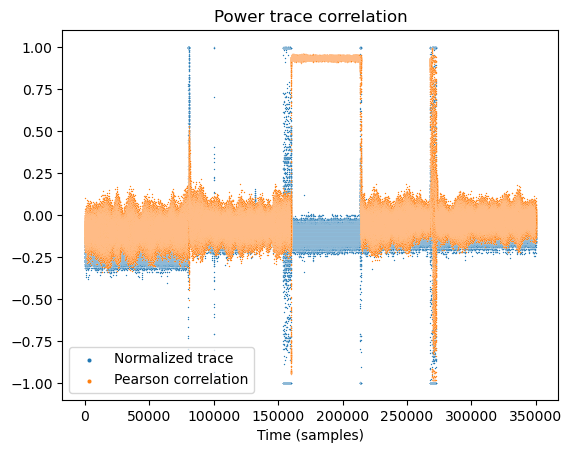

In [56]:

trace = traces_cp_enabled[0]
trace /= np.max(np.abs(trace), axis=0) # Normalize to -1..1
corr = sns.scatterplot(trace, s = 1, label='Normalized trace')

sns.scatterplot(p_corrs, s = 1, label='Pearson correlation')

plt.legend(markerscale=3.)
corr.set(title='Power trace correlation', xlabel='Time (samples)')